In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib


sns.set_palette("husl")

# Loading data

In [4]:
df = pd.read_csv('/content/intern_performance_large.csv')

# Data preprocessing
df['Attendance_Score'] = df['Attendance'].apply(lambda x: 1 if x == 'Present' else 0)
df['Success'] = ((df['Task Completion'] >= 7) & (df['Engagement Score'] >= 4)).astype(int)
le = LabelEncoder()
df['Project_Encoded'] = le.fit_transform(df['Project'])

# Exploratory Data Analysis Visualizations

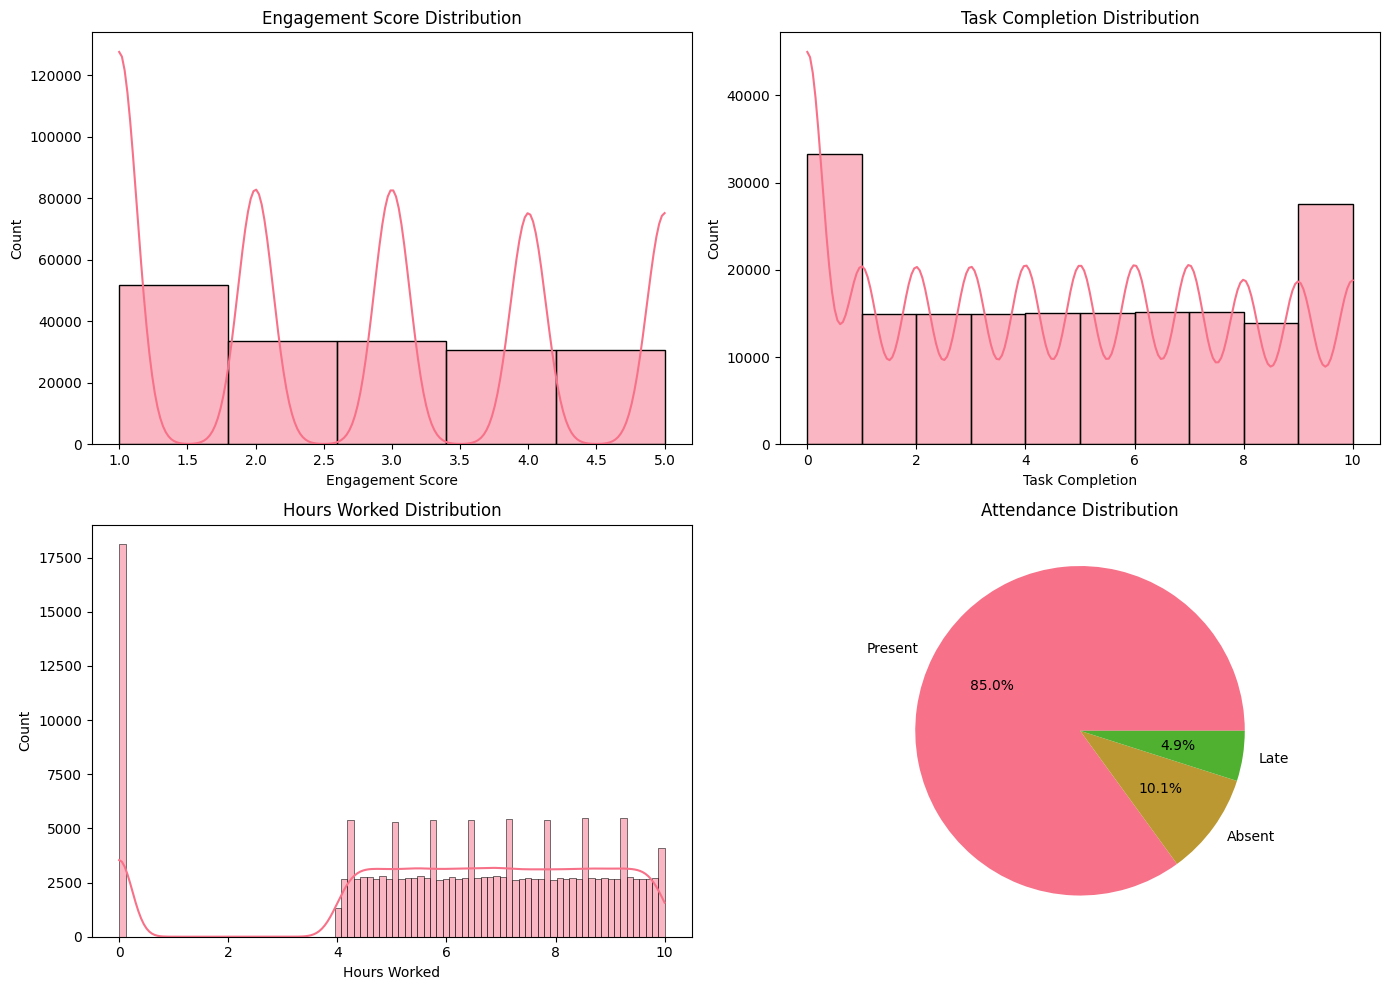

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Engagement Score Distribution
sns.histplot(df['Engagement Score'], bins=5, kde=True, ax=axes[0,0])
axes[0,0].set_title('Engagement Score Distribution')

# Task Completion Distribution
sns.histplot(df['Task Completion'], bins=10, kde=True, ax=axes[0,1])
axes[0,1].set_title('Task Completion Distribution')

# Hours Worked Distribution
sns.histplot(df['Hours Worked'], kde=True, ax=axes[1,0])
axes[1,0].set_title('Hours Worked Distribution')

# Attendance Distribution
attendance_counts = df['Attendance'].value_counts()
axes[1,1].pie(attendance_counts, labels=attendance_counts.index, autopct='%1.1f%%')
axes[1,1].set_title('Attendance Distribution')

plt.tight_layout()
plt.show()

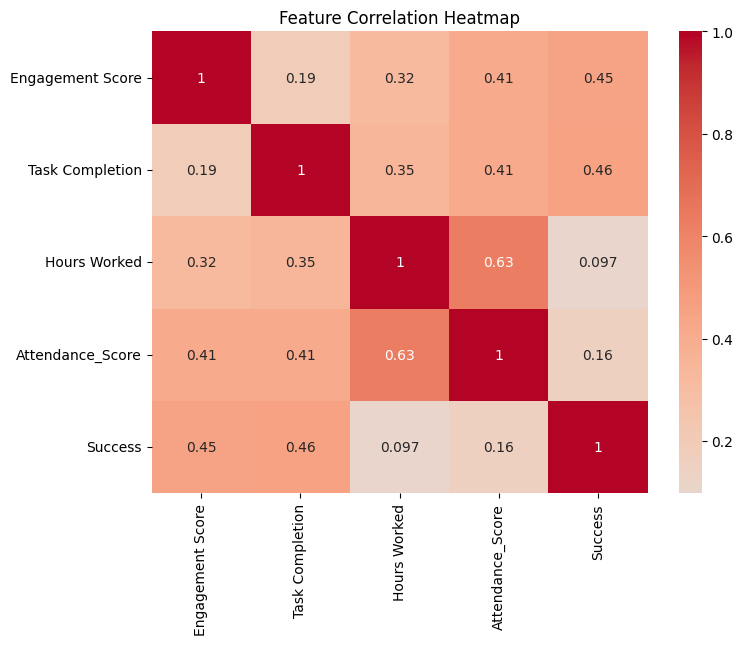

In [7]:
plt.figure(figsize=(8, 6))
numeric_df = df[['Engagement Score', 'Task Completion', 'Hours Worked', 'Attendance_Score', 'Success']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

# Model Training

In [8]:
features = ['Engagement Score', 'Task Completion', 'Hours Worked', 'Attendance_Score', 'Project_Encoded']
target = 'Success'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31653
           1       1.00      1.00      1.00      4347

    accuracy                           1.00     36000
   macro avg       1.00      1.00      1.00     36000
weighted avg       1.00      1.00      1.00     36000



# Feature Importance Visualization

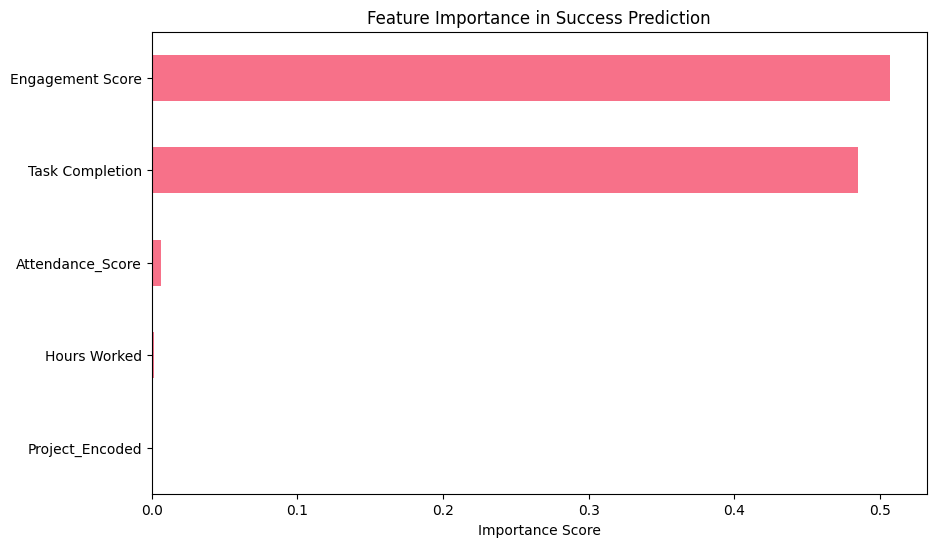

In [9]:
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(model.feature_importances_, index=features)
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance in Success Prediction')
plt.xlabel('Importance Score')
plt.show()

# Success Probability Distribution

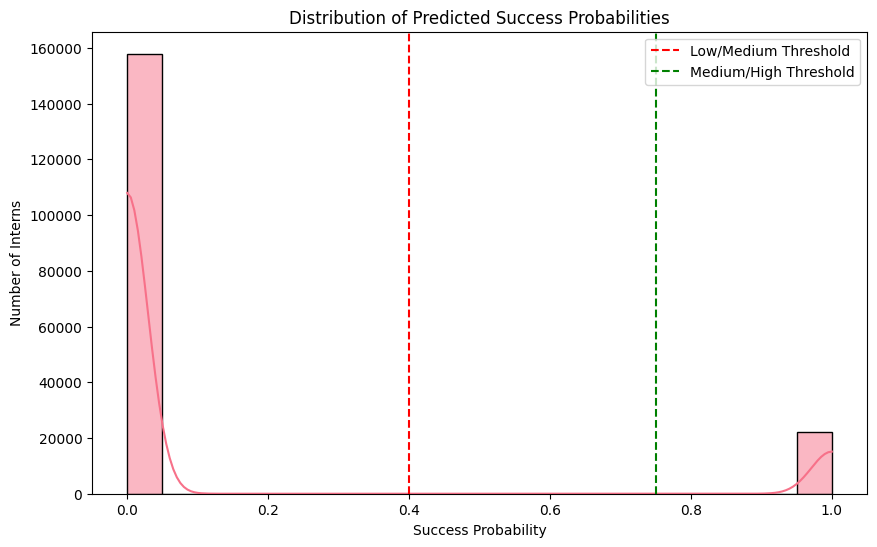

In [10]:
# Get predicted probabilities for all interns
probabilities = model.predict_proba(X)[:, 1]

plt.figure(figsize=(10, 6))
sns.histplot(probabilities, bins=20, kde=True)
plt.title('Distribution of Predicted Success Probabilities')
plt.xlabel('Success Probability')
plt.ylabel('Number of Interns')
plt.axvline(x=0.4, color='r', linestyle='--', label='Low/Medium Threshold')
plt.axvline(x=0.75, color='g', linestyle='--', label='Medium/High Threshold')
plt.legend()
plt.show()

# Interactive Performance Dashboard

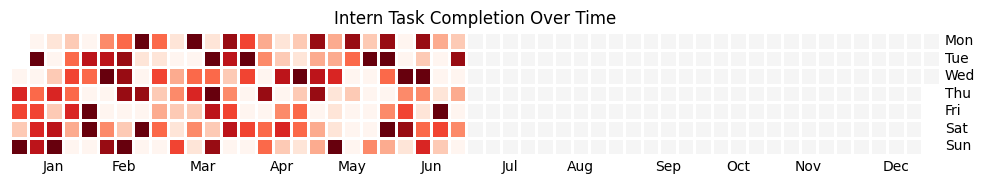

In [22]:
# Assuming 'Task Completion' is the metric to visualize
plt.figure(figsize=(12, 6))
calmap.yearplot(sample_intern['Task Completion'], year=sample_intern.index[0].year)
plt.title('Intern Task Completion Over Time')
plt.show()

# Final Insights with Visualizations
## 1) Engagement-Task Completion Relationship

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



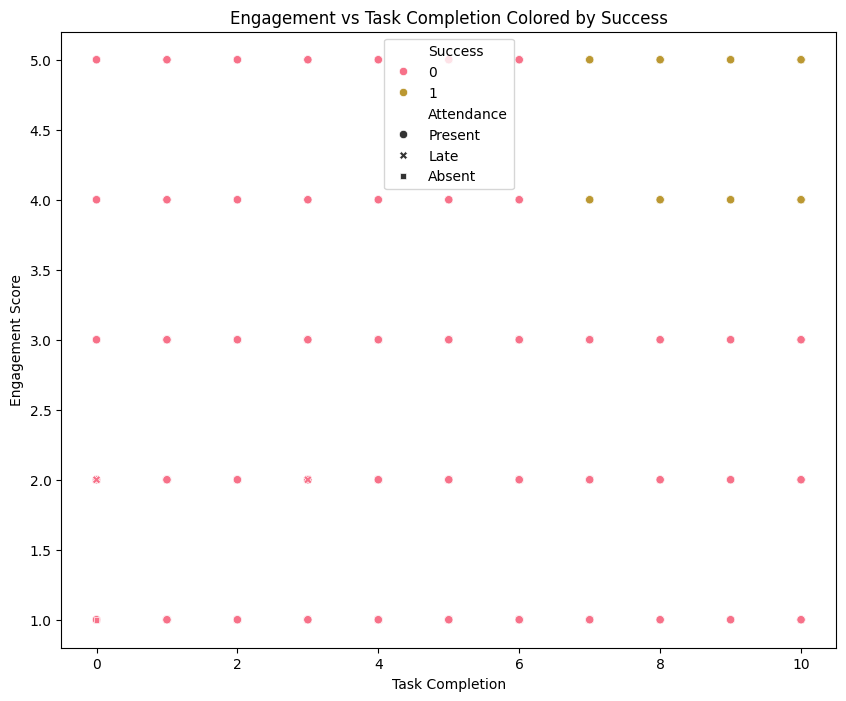

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Task Completion', y='Engagement Score', hue='Success', style='Attendance')
plt.title('Engagement vs Task Completion Colored by Success')
plt.show()

## 2) Performance Trends by Project

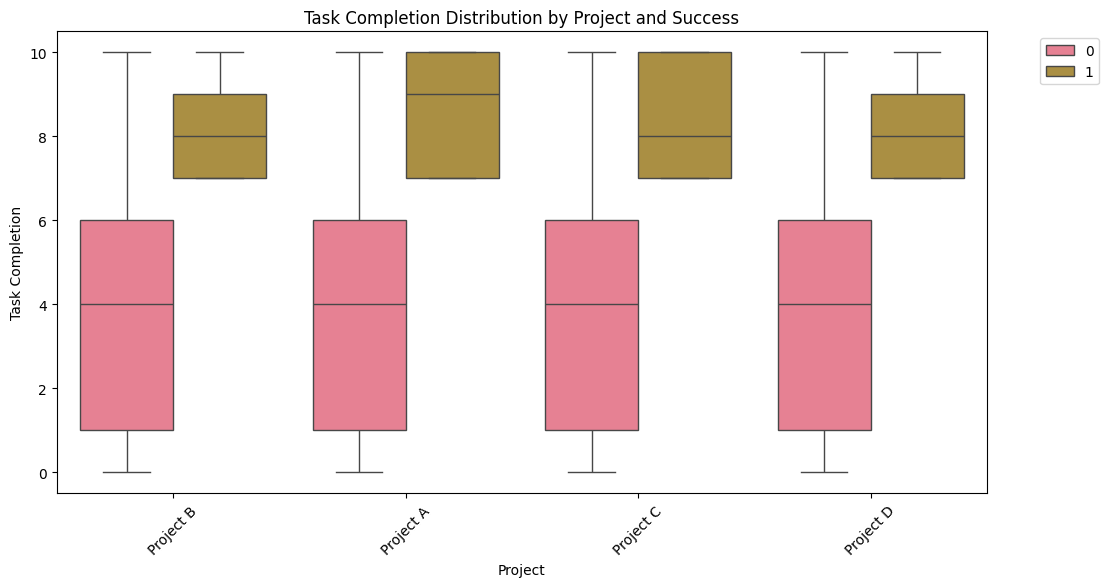

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Project', y='Task Completion', hue='Success')
plt.title('Task Completion Distribution by Project and Success')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3) Weekly Performance Patterns

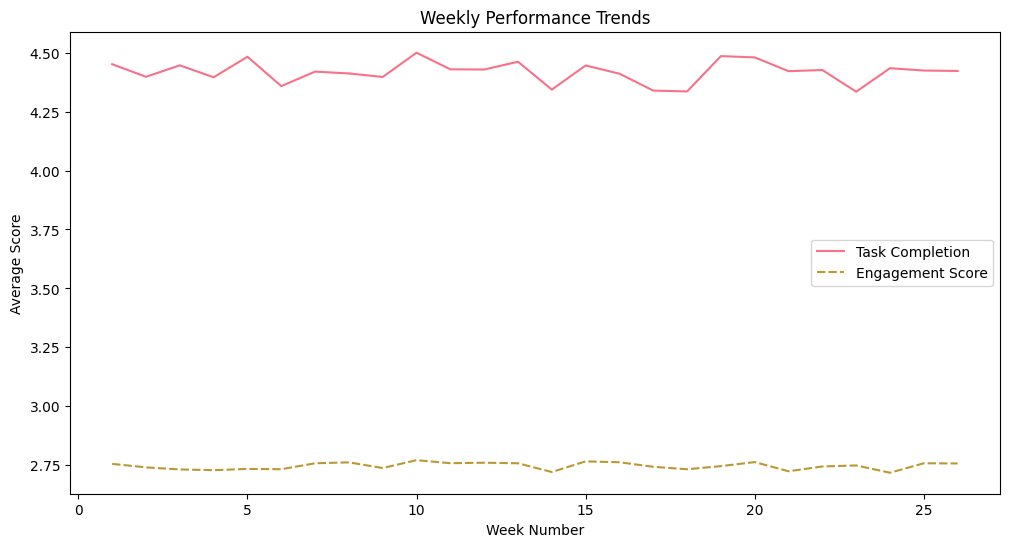

In [14]:
df['Week'] = pd.to_datetime(df['Date']).dt.isocalendar().week
weekly_perf = df.groupby('Week').agg({'Task Completion':'mean', 'Engagement Score':'mean'})

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_perf)
plt.title('Weekly Performance Trends')
plt.ylabel('Average Score')
plt.xlabel('Week Number')
plt.show()